In [52]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'maroon'
df = pd.read_excel(r"CAIT Campaign.xlsx", "Engagement")

In [53]:
df['Date'] =  pd.to_datetime(df['Date'] )
df = df.rename(columns={"FK_ORM":"Actual"})
df = pd.DataFrame(df.iloc[:,0:2])
df                        

,Date,CAIT Protest
0,2020-11-16,672
1,2020-11-17,1019
2,2020-11-18,68
3,2020-11-19,1578
4,2020-11-20,313
5,2020-11-21,29
6,2020-11-22,1030
7,2020-11-23,5324
8,2020-11-24,362
9,2020-11-25,1140


In [54]:
y = df.set_index(['Date'])
y.tail(7)

,CAIT Protest
Date,
2021-01-01,0
2021-01-02,0
2021-01-03,0
2021-01-04,1458
2021-01-05,163
2021-01-06,0
2021-01-07,0


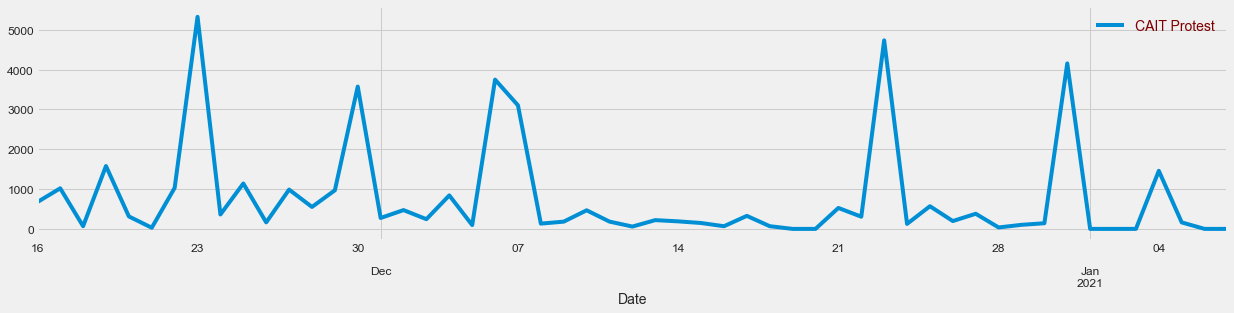

In [55]:
y.plot(figsize=(19, 4))
plt.show()

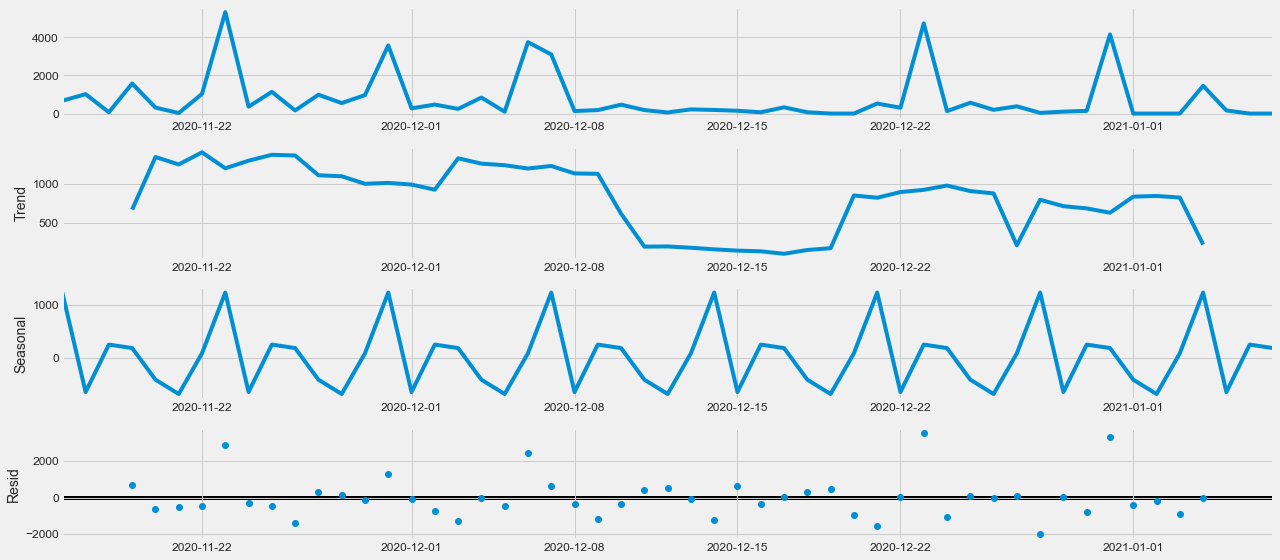

In [56]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [57]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter for SARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter for SARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [58]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:910.361134872882
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:697.7253023050821
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:719.4045789368931
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1291.113705610505
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:713.5094116957755
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:695.7653046898308
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:503.1606072421646
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:483.1145987527341
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:892.7065148153616
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:681.7134111017419
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:704.4496584216736
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1170.7217825359899
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:714.3137200634793
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:682.1206750132853
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:505.1603627579403
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:468.05689377086577
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:913.3048161838149
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:697.1340103605779
ARIMA(0, 

In [59]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 0, 0),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.1708      0.222     -0.771      0.441      -0.605       0.263
ma.S.L12      -1.3377      1.348     -0.992      0.321      -3.980       1.305
sigma2      8.642e+05   1.46e+06      0.593      0.553   -1.99e+06    3.72e+06


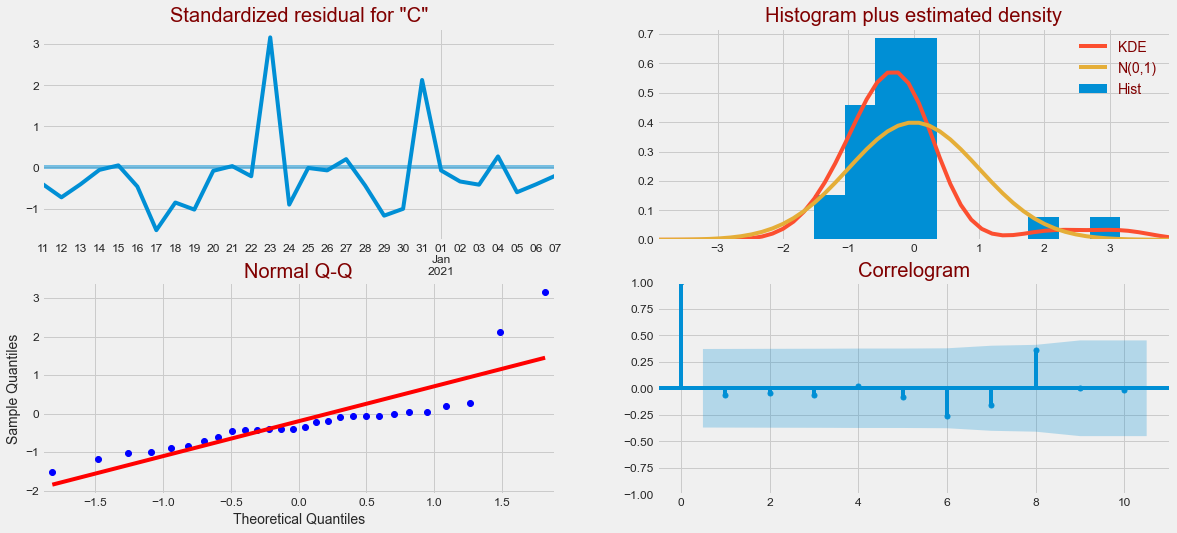

In [60]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

TypeError: The DTypes <class 'numpy.dtype[float64]'> and <class 'numpy.dtype[datetime64]'> do not have a common DType. For example they cannot be stored in a single array unless the dtype is `object`.

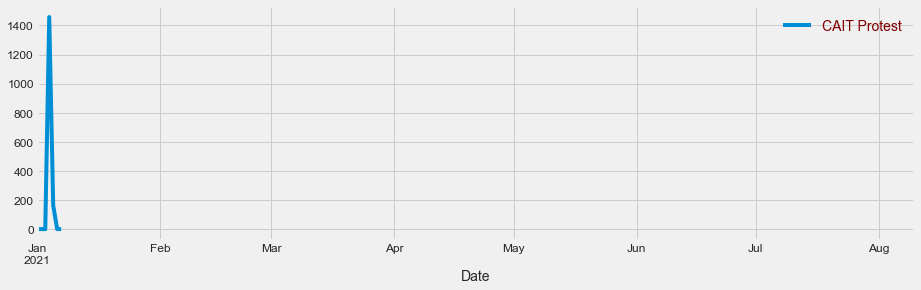

In [61]:
pred = results.get_prediction(start=pd.to_datetime('2021-08-10'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2021':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Trend')
plt.style.use('seaborn-whitegrid')
plt.legend()
plt.show()


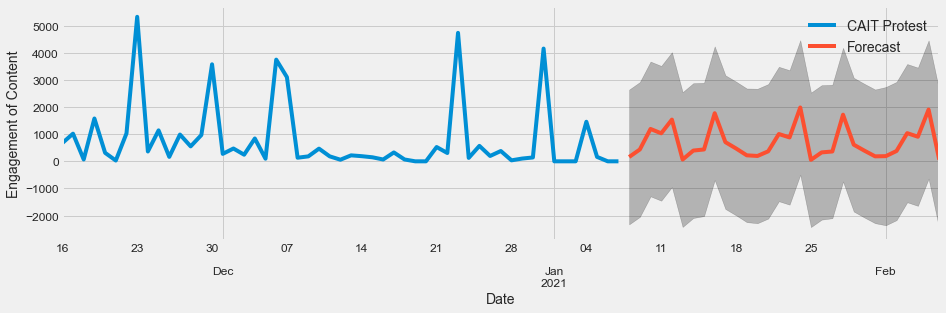

In [62]:
pred_uc = results.get_forecast(steps=30)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 4))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Engagement of Content')
plt.style.use('seaborn-whitegrid')
plt.legend()
plt.show()

<AxesSubplot:>

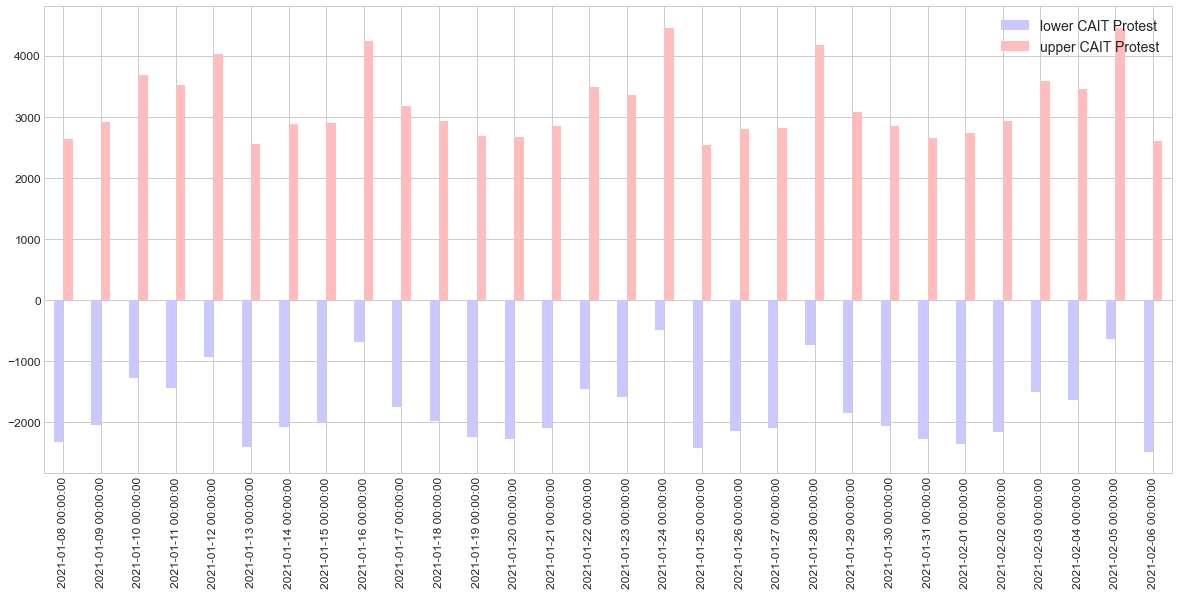

In [63]:
pred_ci.plot(kind="bar", color=["#c9c9ff", "#ffbdbd"])